In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser
import seaborn as sns

In [98]:
cd Desktop/cabs

[Errno 2] No such file or directory: 'Desktop/cabs'
/Users/leon/Desktop/Cabs


# Cab_Data.csv Dataset

In [99]:
cabdf = pd.read_csv('Cab_Data.csv')
customer = pd.read_csv('Customer_ID.csv')
city = pd.read_csv('City.csv')
transaction = pd.read_csv('Transaction_ID.csv')

In [100]:
cabs = pd.merge(cabdf, transaction, on='Transaction ID')
cabs = pd.merge(cabs, customer, on='Customer ID')
cabs = pd.merge(cabs, city, on='City')

In [101]:
cabs

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


In [102]:
cabs['days'] = cabs['Date of Travel'] - 42371

cabs['fecha'] = np.datetime64('2016-01-01')

cabs['Real Date'] = cabs.apply(lambda x: x.fecha + 
                    np.timedelta64(x.days, 'D'), axis=1)

In [103]:
cabs.drop(columns=['Date of Travel', 'days', 'fecha'], inplace=True)


In [104]:
cabs.rename(columns={'Real Date': 'Date'}, inplace=True)

In [105]:
cabs2 = pd.DatetimeIndex(cabs.Date)

In [106]:
cabs2

DatetimeIndex(['2016-01-07', '2018-07-20', '2018-11-22', '2016-01-05',
               '2018-04-20', '2018-05-03', '2018-10-26', '2016-01-01',
               '2016-09-20', '2017-06-22',
               ...
               '2018-10-03', '2017-12-05', '2018-03-14', '2018-01-01',
               '2017-12-16', '2018-03-02', '2018-04-12', '2018-07-05',
               '2018-08-01', '2018-08-29'],
              dtype='datetime64[ns]', name='Date', length=359392, freq=None)

In [107]:
cabs.set_index(cabs2, inplace=True)
cabs.drop(columns=['Date'], inplace=True)
cabs

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
Date,,,,,,,,,,,,,
2016-01-07,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
2018-07-20,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2018-11-22,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
2016-01-05,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
2018-04-20,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-02,10307228,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
2018-04-12,10319775,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
2018-07-05,10347676,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"


In [253]:
cabs['Day'] = cabs2.strftime('%a')
cabs['Year'] = cabs2.strftime('%Y')
cabs['Month'] = cabs2.strftime('%m')
cabs['Profit'] = cabs['Price Charged'] - cabs['Cost of Trip']
cabs['GrossP'] = (cabs['Profit'] / cabs['Cost of Trip'])*100
cabs['P/KM'] = cabs['Profit']/cabs['KM Travelled']
cabs


,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Day,Year,Month,Profit,P/KM,Profitp,GrossP
Date,,,,,,,,,,,,,,,,,,,,
2016-01-07,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",Thu,2016,01,57.3150,1.882266,18.274427,18.274427
2018-07-20,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",Fri,2018,07,281.2772,10.739870,88.612790,88.612790
2018-11-22,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",Thu,2018,11,194.6480,4.574571,32.582415,32.582415
2016-01-05,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",Tue,2016,01,23.6660,0.826904,7.067558,7.067558
2018-04-20,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",Fri,2018,04,253.9808,6.981330,54.371732,54.371732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-02,10307228,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001",Fri,2018,03,143.6180,3.740052,27.339562,27.339562
2018-04-12,10319775,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001",Thu,2018,04,23.0464,6.455574,51.727358,51.727358
2018-07-05,10347676,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001",Thu,2018,07,-5.8540,-0.249531,-1.732855,-1.732855


Text(0.5, 0.98, 'Average Profit Per Km')

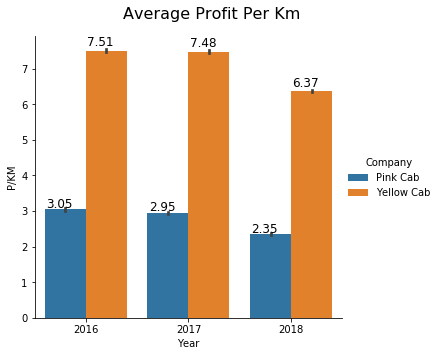

In [254]:
g = sns.catplot(x='Year', y='P/KM',
             data=cabs, kind='bar', hue='Company',
               )
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Average Profit Per Km', fontsize=16)



Text(0.5, 0.98, ' Gross Profit Percentage/Year')

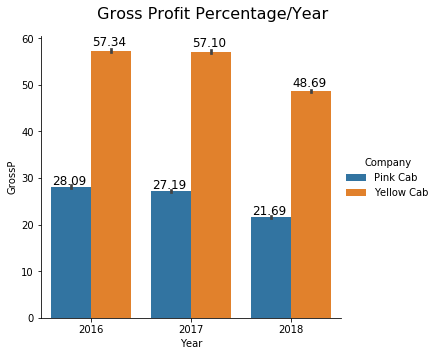

In [257]:
g = sns.catplot(x='Year', y='GrossP',
             data=cabs, kind='bar', hue='Company',
               )
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle(' Gross Profit Percentage/Year', fontsize=16)




In [482]:
s1 = cabs[cabs.Company=='Pink Cab']
s2 = cabs[cabs.Company=='Yellow Cab']
s1 = s1.groupby('City').mean()
s2 = s2.groupby('City').mean()
s3 = s1+s2

ha = s1.GrossP.values
he = s2.GrossP.values
he
hi = np.append(he, ha)
hi

array([ 44.34586252,  42.639859  ,  20.99124432,  22.05342917,
        66.15599532,  49.94061796,  39.37510141,  44.9016558 ,
        24.62183671, 104.26706816,  49.20208642,  44.62558674,
        35.60165924,  20.15011378,  33.04546891,  31.73016349,
        68.97903498,  24.31492758,  27.91541631,  22.36657577,
        33.12457013,  20.68203555,  14.0626133 ,   7.83471785,
        11.96154779,  23.113694  ,  33.00466435,  14.24358376,
        43.99388871,  27.6252812 ,  17.62178072,  10.00657168,
        16.84057743,  24.37012402,  16.9269398 ,  35.82890309,
        30.07478272,  21.36671257])

In [483]:
s1.GrossP.values

array([22.36657577, 33.12457013, 20.68203555, 14.0626133 ,  7.83471785,
       11.96154779, 23.113694  , 33.00466435, 14.24358376, 43.99388871,
       27.6252812 , 17.62178072, 10.00657168, 16.84057743, 24.37012402,
       16.9269398 , 35.82890309, 30.07478272, 21.36671257])

Text(0.5, 0.98, 'Gross Profit Percentage per city')

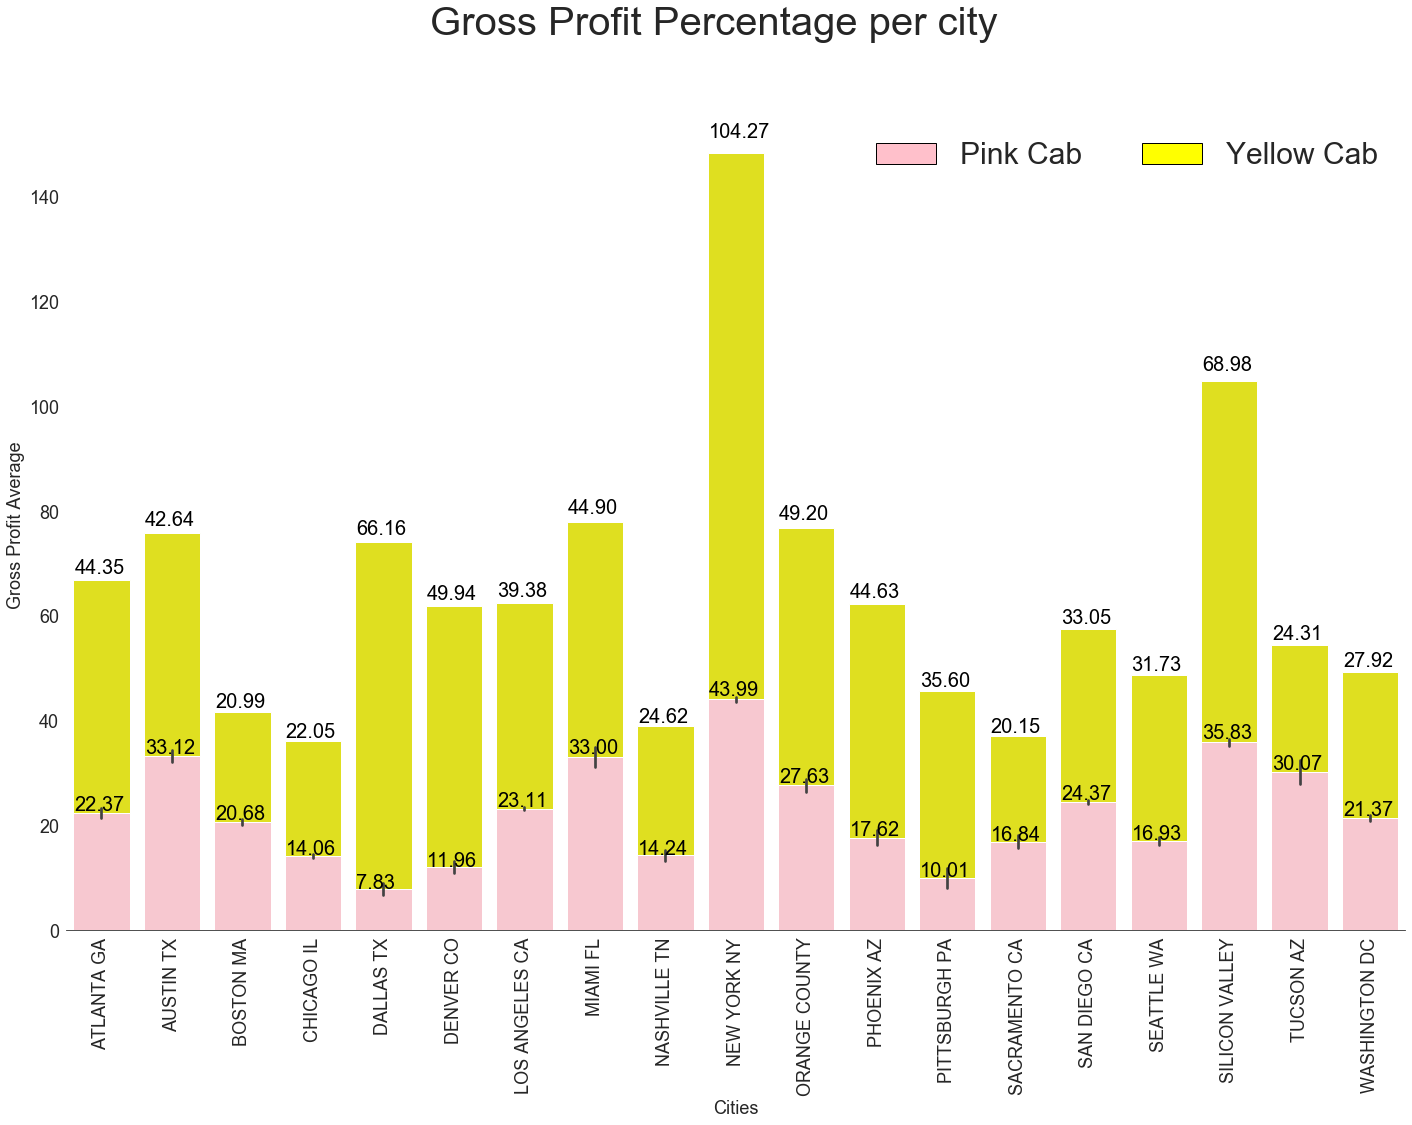

In [492]:
#Read in data & create total column

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 15)})

#Plot 1 - background - "total" (top) series
#sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
#bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")


sns.barplot(x=list(s3.index), y='GrossP', data=s3, color='Yellow')
bottom_plot = sns.barplot(x='City', y='GrossP', data=cabs[cabs.Company == 'Pink Cab'], color='pink')

topbar = plt.Rectangle((0,0),1,1,fc="Yellow", edgecolor = 'black')
bottombar = plt.Rectangle((0,0),1,1,fc='pink',  edgecolor = 'black')
l = plt.legend([bottombar, topbar], ['Pink Cab', 'Yellow Cab'], loc='best', ncol = 2, prop={'size':30})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Gross Profit Average ")
bottom_plot.set_xlabel("Cities")



#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(18)
    plt.xticks(rotation=90)
    
x = np.linspace(10, 100, 38)   
ax = bottom_plot
for p,i in zip(ax.patches, hi):
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(i), 
            color='black', rotation='horizontal', size='20')   
plt.suptitle('Gross Profit Percentage per city', size=40)

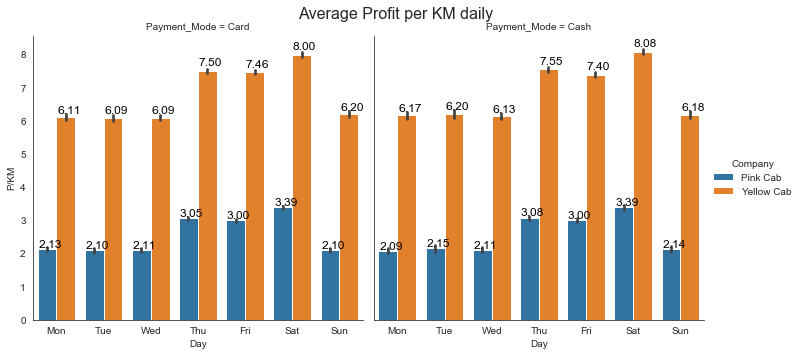

In [493]:
g = sns.catplot(x='Day', y='P/KM',
             data=cabs, kind='bar', hue='Company',
            col='Payment_Mode', order=['Mon', 'Tue', 'Wed',
                                'Thu', 'Fri','Sat', 'Sun'])

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Average Profit per KM daily', fontsize=16)
ax = g.facet_axis(0,0)
ax2 = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
ax2 = g.facet_axis(0,1)
for p in ax2.patches:
    ax2.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')


plt.show()

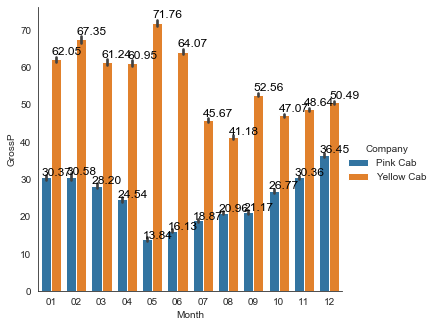

In [508]:
g = sns.catplot(x='Month', y='GrossP',
             data=cabs, kind='bar', hue='Company'
            )

g.fig.subplots_adjust(top=0.9)
#g.fig.suptitle('Average Profit per KM daily', fontsize=16)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')


In [497]:
s1 = cabs[cabs.Company=='Pink Cab']
s2 = cabs[cabs.Company=='Yellow Cab']
s1 = s1.groupby('Month').mean()
s2 = s2.groupby('Month').mean()
s3 = s1+s2

ha = s1.GrossP.values
he = s2.GrossP.values
he
hi = np.append(he, ha)
hi

array([62.05383846, 67.34722504, 61.2355651 , 60.9512037 , 71.76029232,
       64.07334261, 45.67264521, 41.17790913, 52.5566525 , 47.07052021,
       48.6383793 , 50.48948192, 30.37264376, 30.58408213, 28.1990667 ,
       24.54141461, 13.84326551, 16.1345018 , 18.87481105, 20.95771626,
       21.16686478, 26.77345304, 30.35879769, 36.44942069])

Text(0.5, 0.98, 'Gross Profit Percentage per Month')

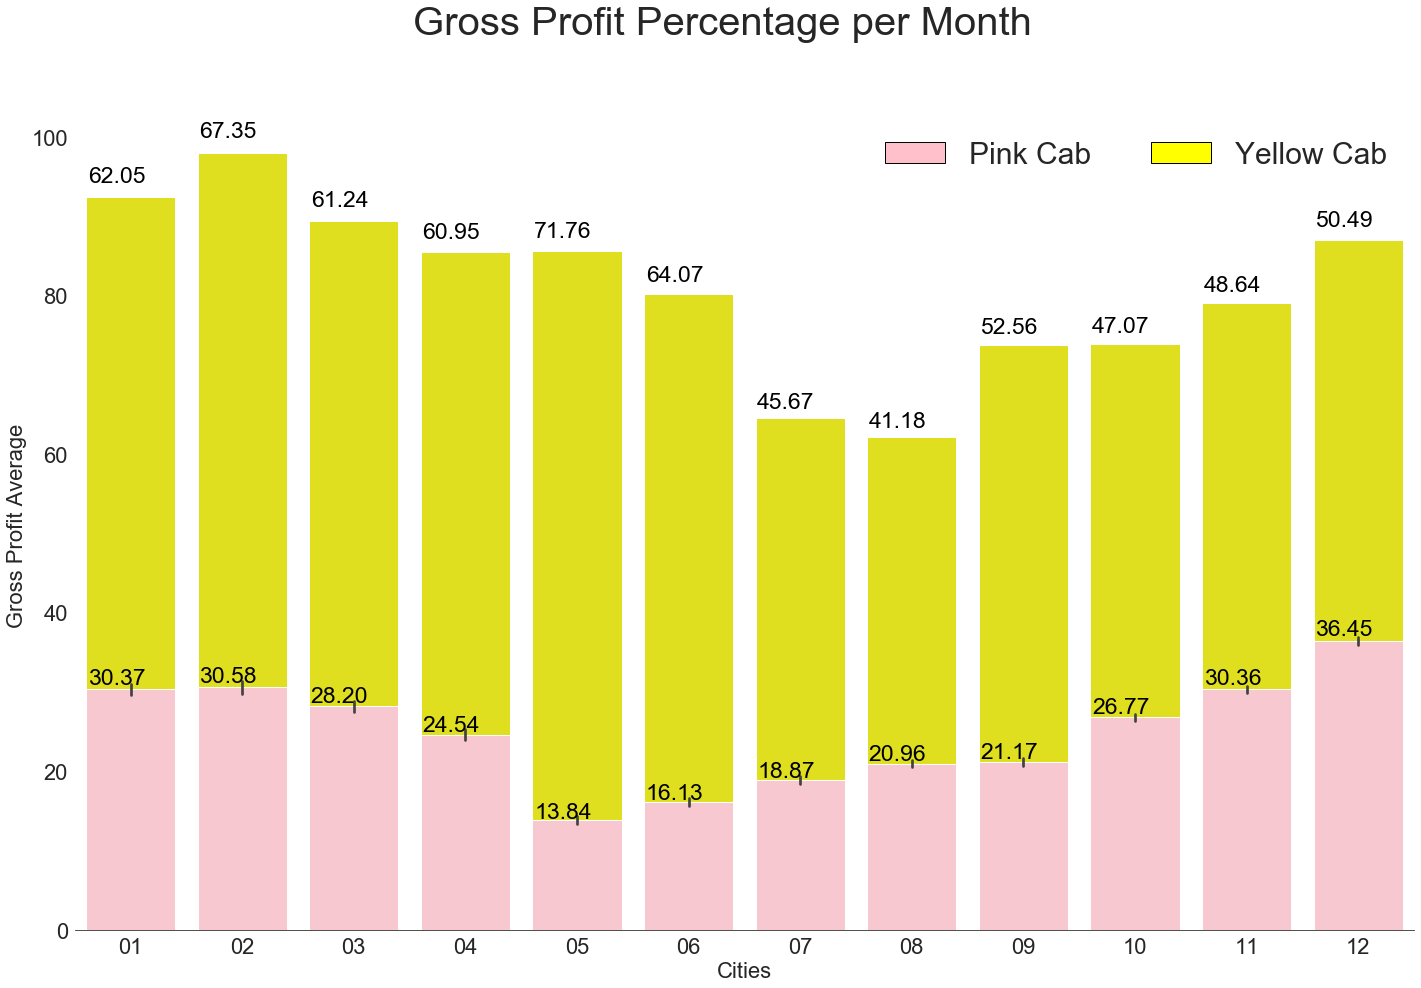

In [503]:
#Read in data & create total column

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 15)})

#Plot 1 - background - "total" (top) series
#sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
#bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")


sns.barplot(x=list(s3.index), y='GrossP', data=s3, color='Yellow')
bottom_plot = sns.barplot(x='Month', y='GrossP', data=cabs[cabs.Company == 'Pink Cab'], color='pink')

topbar = plt.Rectangle((0,0),1,1,fc="Yellow", edgecolor = 'black')
bottombar = plt.Rectangle((0,0),1,1,fc='pink',  edgecolor = 'black')
l = plt.legend([bottombar, topbar], ['Pink Cab', 'Yellow Cab'], loc='best', ncol = 2, prop={'size':30})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Gross Profit Average ")
bottom_plot.set_xlabel("Cities")



#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(22)
    plt.xticks()
    
x = np.linspace(10, 100, 38)   
ax = bottom_plot
for p,i in zip(ax.patches, hi):
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(i), 
            color='black', rotation='horizontal', size='23')   
plt.suptitle('Gross Profit Percentage per Month', size=40)


plt.hist(cabs.Age, bins=48)
plt.xticks(size=30)
plt.yticks(size=30)
len(cabs.Age.unique())

In [728]:
ages = cabs.groupby('Age').count()
ages['percentage'] = ages.Profitp.apply(lambda x: x / ages.Profitp.sum() *100)
ages2 = ages[['percentage']].reset_index()
ages2
ages3 = pd.cut(ages2.Age, bins=5)
results = (pd.Series(ages2.percentage).groupby(ages3).agg(['sum']))
results

,sum
Age,
"(17.953, 27.4]",32.563051
"(27.4, 36.8]",28.042639
"(36.8, 46.2]",19.160694
"(46.2, 55.6]",9.639057
"(55.6, 65.0]",10.594560


,sum,mean
Age,,
"(17.953, 27.4]",5.611184e+06,47.946954
"(27.4, 36.8]",4.777849e+06,47.407295
"(36.8, 46.2]",3.254527e+06,47.261578
"(46.2, 55.6]",1.662965e+06,48.004305
"(55.6, 65.0]",1.772902e+06,46.562187


In [738]:
per = results.reset_index()
per

,Age,sum
0,"(17.953, 27.4]",32.563051
1,"(27.4, 36.8]",28.042639
2,"(36.8, 46.2]",19.160694
3,"(46.2, 55.6]",9.639057
4,"(55.6, 65.0]",10.594560


Text(0.5, 0.98, ' Age Group')

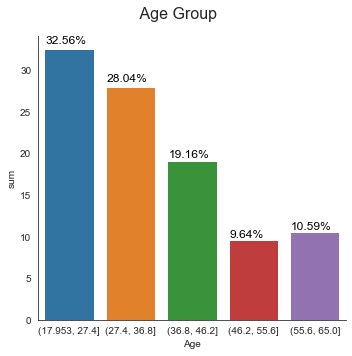

In [759]:
g = sns.catplot('Age', 'sum', data=per, kind='bar')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}%'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle(' Age Group', fontsize=16)



yellow = cabs[cabs.Company =='Yellow Cab'] 
pink = cabs[cabs.Company == 'Pink Cab']
yellow.head()
yearsy = yellow.groupby('Year').sum()


In [869]:
cabs4 = cabs[['Company', 'Year', 'Age', 'Profit']].reset_index()
cabs4.drop(columns='Date', inplace=True)
cabs5 =cabs4.set_index(['Year', 'Company'])
cabs5

Age    Profit
Year Company                  
2016 Pink Cab     28   57.3150
2018 Yellow Cab   28  281.2772
     Yellow Cab   28  194.6480
2016 Pink Cab     27   23.6660
2018 Yellow Cab   27  253.9808
...              ...       ...
     Yellow Cab   29  143.6180
     Yellow Cab   29   23.0464
     Yellow Cab   29   -5.8540
     Yellow Cab   29   -6.0900
     Yellow Cab   29   25.7948

[359392 rows x 2 columns]

In [835]:
algo5 = pd.cut(cabs5.Age, bins=5)

In [836]:
algo5

Year  Company   
2016  Pink Cab        (27.4, 36.8]
2018  Yellow Cab      (27.4, 36.8]
      Yellow Cab      (27.4, 36.8]
2016  Pink Cab      (17.953, 27.4]
2018  Yellow Cab    (17.953, 27.4]
                         ...      
      Yellow Cab      (27.4, 36.8]
      Yellow Cab      (27.4, 36.8]
      Yellow Cab      (27.4, 36.8]
      Yellow Cab      (27.4, 36.8]
      Yellow Cab      (27.4, 36.8]
Name: Age, Length: 359392, dtype: category
Categories (5, interval[float64]): [(17.953, 27.4] < (27.4, 36.8] < (36.8, 46.2] < (46.2, 55.6] < (55.6, 65.0]]

In [857]:
cabs6 = (pd.Series(cabs5.Profit)).groupby(['Year', 'Company', algo5]).count()
cabs6
cabs7 = cabs6.reset_index()
cabs7

,Year,Company,Age,Profit
0,2016,Pink Cab,"(17.953, 27.4]",8215
1,2016,Pink Cab,"(27.4, 36.8]",7066
2,2016,Pink Cab,"(36.8, 46.2]",4811
3,2016,Pink Cab,"(46.2, 55.6]",2423
4,2016,Pink Cab,"(55.6, 65.0]",2770
5,2016,Yellow Cab,"(17.953, 27.4]",26889
6,2016,Yellow Cab,"(27.4, 36.8]",23493
7,2016,Yellow Cab,"(36.8, 46.2]",15821
8,2016,Yellow Cab,"(46.2, 55.6]",7954
9,2016,Yellow Cab,"(55.6, 65.0]",8780


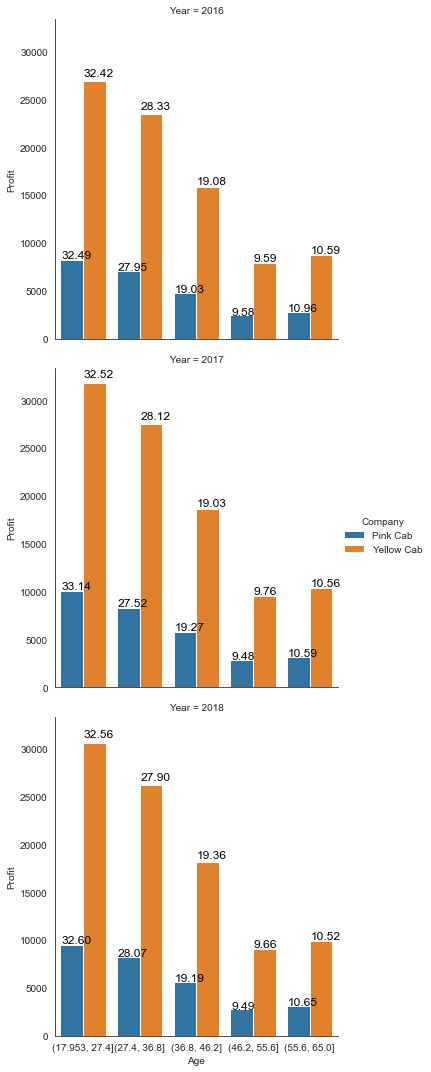

In [931]:
g = sns.catplot('Age', 'Profit', hue='Company', data=cabs7, kind='bar',
               row='Year')
L = 5*[25285]
l6 = 5*[82937]
L3 = np.append(L,l6)
l1 = 5 * [cabs7[cabs7.Year=='2017'].Profit[:5].sum()]
l2 = 5 * [cabs7[cabs7.Year=='2017'].Profit[5:].sum()]
L4 = np.append(l1,l2)
l3 = 5 * [cabs7[cabs7.Year=='2018'].Profit[:5].sum()]
l4 = 5 * [cabs7[cabs7.Year=='2018'].Profit[5:].sum()]
L5 = np.append(l3, l4)


ax2 = g.facet_axis(0,0)
for p,i in zip(ax2.patches,L3):
    ax2.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()/i*100), 
            color='black', rotation='horizontal', size='large')
ax3 = g.facet_axis(1,0)
for p,i in zip(ax3.patches,L4):
    ax3.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()/i*100), 
            color='black', rotation='horizontal', size='large')
ax4 = g.facet_axis(2,0)
for p,i in zip(ax4.patches,L5):
    ax4.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()/i*100), 
            color='black', rotation='horizontal', size='large')

In [935]:
print(len(cabs))
print(len(cabs['Customer ID'].unique()))

359392
46148


In [937]:
cabs9 = cabs.drop_duplicates(['Customer ID'])
cabs9

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Day,Year,Month,Profit,P/KM,Profitp,GrossP
Date,,,,,,,,,,,,,,,,,,,,
2016-01-07,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",Thu,2016,01,57.3150,1.882266,18.274427,18.274427
2016-01-05,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",Tue,2016,01,23.6660,0.826904,7.067558,7.067558
2016-01-01,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701",Fri,2016,01,27.5680,3.049558,28.236644,28.236644
2016-01-06,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,"814,885","24,701",Wed,2016,01,25.7980,0.777751,7.337273,7.337273
2016-01-02,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,"814,885","24,701",Sat,2016,01,16.8440,1.929439,17.227131,17.227131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-22,10197277,Pink Cab,WASHINGTON DC,32.64,375.27,368.8320,51510,Card,Female,18,6855,"418,859","127,001",Sat,2017,07,6.4380,0.197243,1.745510,1.745510
2017-07-20,10199158,Yellow Cab,WASHINGTON DC,2.02,26.13,24.9672,52759,Card,Female,58,2615,"418,859","127,001",Thu,2017,07,1.1628,0.575644,4.657310,4.657310
2017-07-30,10201973,Yellow Cab,WASHINGTON DC,17.25,225.16,215.2800,51078,Card,Male,21,8810,"418,859","127,001",Sun,2017,07,9.8800,0.572754,4.589372,4.589372


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

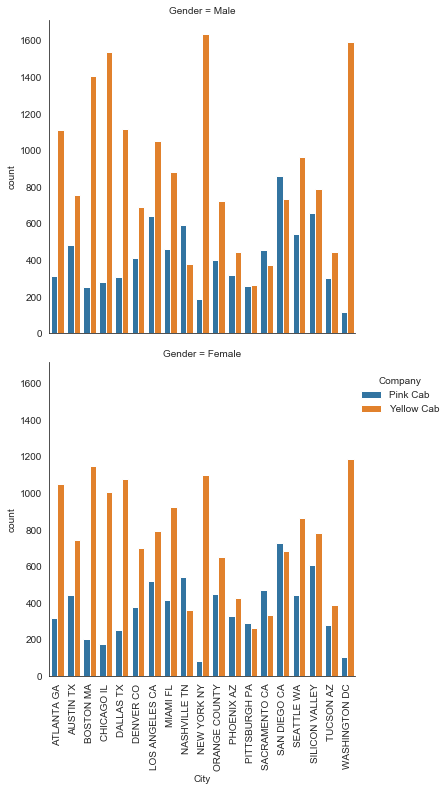

In [975]:
ax = sns.catplot(x="City", hue="Company", row='Gender',
                  data=cabs9, kind='count')
plt.xticks(rotation=90)


In [1060]:
s1 = cabs9[cabs9.Company=='Pink Cab']
s2 = cabs9[cabs9.Company=='Yellow Cab']
s1 = s1.groupby('City').count()
s2 = s2.groupby('City').count()
s3 = s1+s2
s3
ho1 = s1.GrossP.values
ho2 = s2.GrossP.values
ho = np.append(ho2, ho1)
ho3 = ho1+ho2
ho3
ho4 = np.append(ho3,ho3)
ho4

array([2780, 2419, 3000, 3000, 2743, 2171, 3000, 2680, 1869, 3000, 2216,
       1515, 1068, 1633, 2998, 2811, 2834, 1411, 3000, 2780, 2419, 3000,
       3000, 2743, 2171, 3000, 2680, 1869, 3000, 2216, 1515, 1068, 1633,
       2998, 2811, 2834, 1411, 3000])

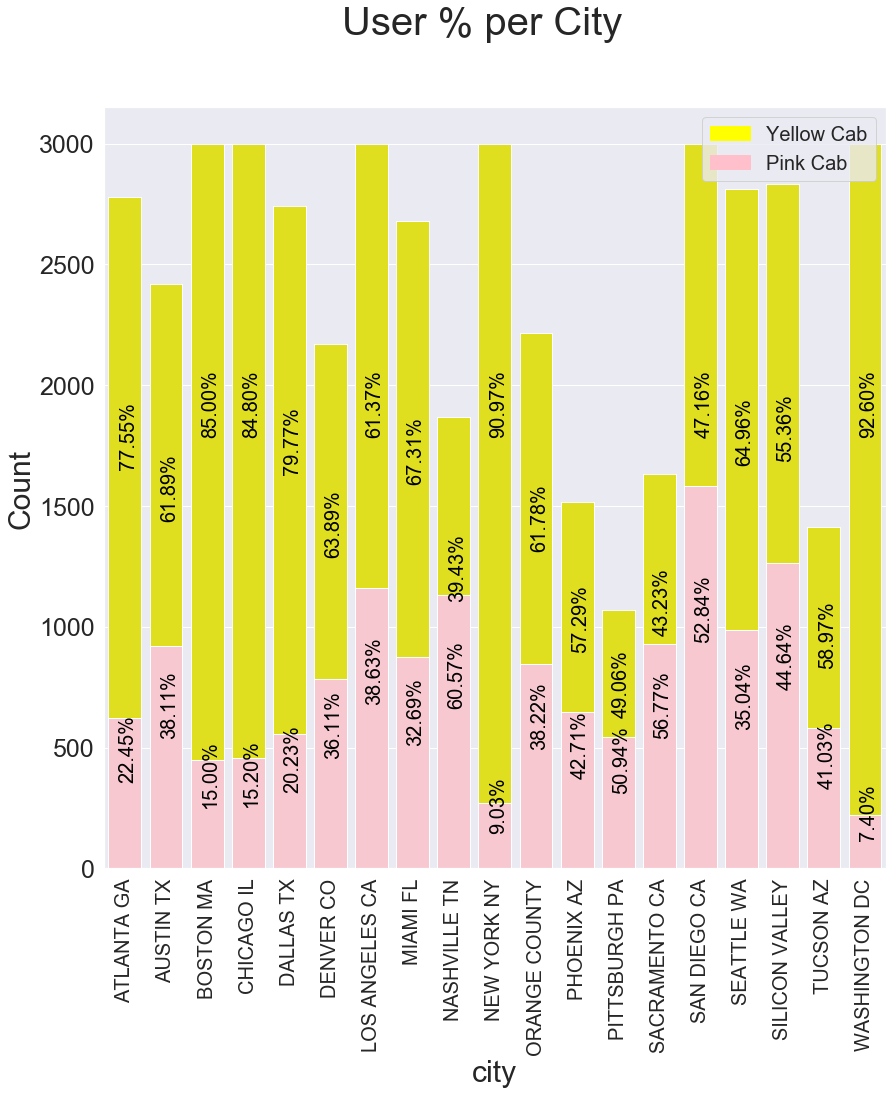

In [1122]:
import matplotlib.patches as mpatches

sns.set(style="darkgrid")
plt.figure(figsize=(14, 14))


cabs9y = cabs9[cabs9.Company=='Yellow Cab']
cabs9p = cabs9[cabs9.Company=='Pink Cab']

bar2p = sns.countplot(x='City', data=cabs9, color='yellow',
                      )
bar2p = sns.countplot(x='City', data=cabs9p, color='pink')

top_bar = mpatches.Patch(color='yellow', label='Yellow Cab')
bottom_bar = mpatches.Patch(color='pink', label='Pink Cab')



for p,i,j in zip(bar2p.patches, ho, ho4):
    bar2p.text(p.get_x() + 0.25, 
            p.get_height() * .60, 
            '{0:.2f}%'.format(i/j*100), 
            color='black', rotation='vertical', size='20')   




plt.legend(handles=[top_bar, bottom_bar], fontsize=20, loc=1)
plt.xticks(rotation=90, size=20)
plt.yticks(size=25)
plt.suptitle('User % per City', size=40)
plt.xlabel('city', size=30)
plt.ylabel('Count', size=30)
plt.show()


In [1001]:
cabs9[cabs9['City']=='ATLANTA GA']

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Day,Year,Month,Profit,P/KM,Profitp,GrossP
Date,,,,,,,,,,,,,,,,,,,,
2016-01-07,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",Thu,2016,01,57.3150,1.882266,18.274427,18.274427
2016-01-05,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",Tue,2016,01,23.6660,0.826904,7.067558,7.067558
2016-01-01,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701",Fri,2016,01,27.5680,3.049558,28.236644,28.236644
2016-01-06,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,"814,885","24,701",Wed,2016,01,25.7980,0.777751,7.337273,7.337273
2016-01-02,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,"814,885","24,701",Sat,2016,01,16.8440,1.929439,17.227131,17.227131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,10433075,Pink Cab,ATLANTA GA,40.33,573.01,471.8610,28296,Card,Female,53,3995,"814,885","24,701",Thu,2018,12,101.1490,2.508034,21.436186,21.436186
2018-12-24,10434098,Yellow Cab,ATLANTA GA,2.28,39.35,30.3696,29895,Card,Male,31,24885,"814,885","24,701",Mon,2018,12,8.9804,3.938772,29.570360,29.570360
2018-12-28,10434122,Yellow Cab,ATLANTA GA,35.15,658.16,493.5060,27166,Card,Male,62,9747,"814,885","24,701",Fri,2018,12,164.6540,4.684324,33.364133,33.364133
